In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
comments = pd.read_csv("../input/youtube-comments-dataset/60b0fadace093h",error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [5]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


# Performing Sentiment Analysis On Youtube Data

In [6]:
!pip install textblob

In [8]:
from textblob import TextBlob

In [9]:
TextBlob("It's more accurate to call it the M+ (1000) be...").sentiment.polarity

0.45000000000000007

In [10]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [11]:
comments.dropna(inplace=True)

In [12]:
polarity=[]
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [13]:
comments['polarity'] = polarity

In [14]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


# Performing EDA for the Positive and Negative Sentences

In [15]:
comments_positive = comments[comments['polarity']==1]

In [16]:
comments_positive.shape

(20400, 5)

In [17]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


# Word Cloud

In [18]:
!pip install wordcloud

In [19]:
from wordcloud import WordCloud,STOPWORDS

In [20]:
stopwords = set(STOPWORDS)

In [22]:
total_comments = ''.join(comments_positive['comment_text'])

In [24]:
wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

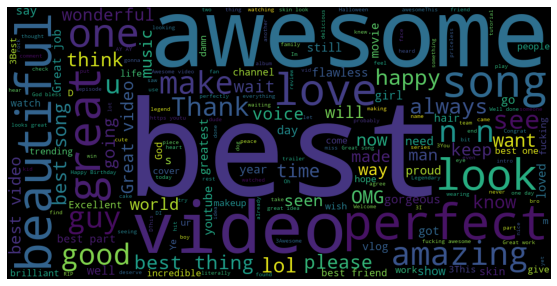

In [26]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [27]:
comments_negative = comments[comments['polarity']==-1]

In [28]:
total_comments = ''.join(comments_negative['comment_text'])

In [29]:
wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

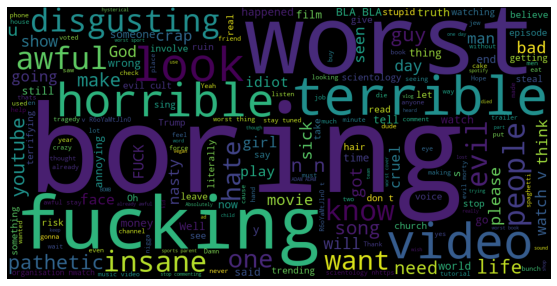

In [30]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Analyze Trending Tags and Views of Youtube

In [31]:
videos = pd.read_csv('../input/usvideos-data/60b102aca3142h',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [32]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [33]:
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [35]:
tags_complete = ' '.join(videos['tags'])

In [38]:
import re

In [40]:
tags = re.sub('[^a-zA-Z]',' ',tags_complete)

In [42]:
tags = re.sub(' +',' ',tags)

In [45]:
wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

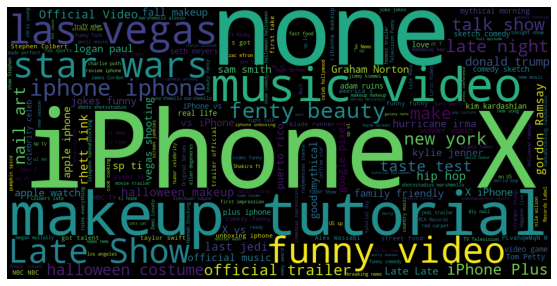

In [47]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Plotting regression on views and likes

Text(0.5, 1.0, 'Regression Plot For Views Ans Likes')

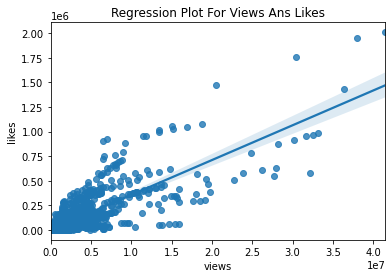

In [48]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression Plot For Views Ans Likes')

# Plotting regression on views and likes

Text(0.5, 1.0, 'Regression Plot For Views Ans Dislikes')

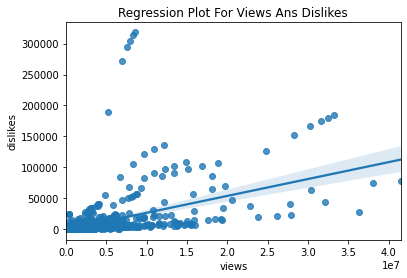

In [49]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression Plot For Views Ans Dislikes')

In [50]:
df_corr = videos[['views','likes','dislikes']]

In [52]:
df_corr.corr()

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


<AxesSubplot:>

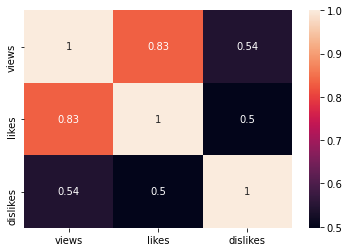

In [54]:
sns.heatmap(df_corr.corr(),annot=True)

# Emoji's Analysis In Comments

In [55]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [56]:
comments['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [60]:
print('\U0001F600')

😀


In [61]:
!pip install emoji

In [62]:
import emoji

In [63]:
len(comments)

718424

In [65]:
comment = comments['comment_text'][1]

In [68]:
comment

'To be there with a samsung phone\\n😂😂😂'

In [75]:
[c for c in comment if c in emoji.UNICODE_EMOJI]

[]

In [76]:
str=''
for i in comments['comment_text']:
    list = [c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele

In [77]:
len(str)

0

In [78]:
str

''

# Finding Top 20 Emojis

In [79]:
result = {}
for i in set(str):
    result[i]=str.count(i)

In [80]:
result

{}

In [81]:
result.items()

dict_items([])

In [83]:
final={}
for key,value in sorted(result.items(),key= lambda item:item[1]):
  final[key]=value

In [84]:
final

{}

In [85]:
keys = [*final.keys()]

In [86]:
keys

[]

In [88]:
values = [*final.values()]

In [91]:
df = pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})

In [93]:
df.head()

,chars,num


In [94]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [98]:
trace = go.Bar(
x=df['chars'],
y=df['num'])
iplot([trace])